In [2]:
import sys, os
sys.path.append(os.path.dirname(os.getcwd())) # Include ../SSD in path
import tops
import numpy as np
import matplotlib.pyplot as plt
import pathlib
from ssd.utils import load_config

C:\Users\ITG7\anaconda3\envs\tdt4265\lib\site-packages\setuptools\distutils_patch.py:26: UserWarning: Distutils was imported before Setuptools. This usage is discouraged and may exhibit undesirable behaviors or errors. Please use Setuptools' objects directly or at least import Setuptools first.
  "Distutils was imported before Setuptools. This usage is discouraged "


In [3]:
cfg = load_config("../configs/task2_3_fpn.py")
logs_fpn = tops.logger.read_logs(pathlib.Path("../outputs/task2_3_fpn"))
cfg = load_config("../configs/task2_3_focal_loss.py")
logs_focal_loss = tops.logger.read_logs(pathlib.Path("../outputs/task2_3_focal_loss"))
cfg = load_config("../configs/task2_3_dpr_reg_hds.py")
logs_dpr_reg_hds = tops.logger.read_logs(pathlib.Path("../outputs/task2_3_dpr_reg_hds"))
cfg = load_config("../configs/task2_3_w_init.py")
logs_w_init = tops.logger.read_logs(pathlib.Path("../outputs/task2_3_w_init"))
cfg = load_config("../configs/task4_1_bifpn.py")
logs_bifpn = tops.logger.read_logs(pathlib.Path("../outputs/task4_1_bifpn"))

Saving SSD outputs to: outputs/
Saving SSD outputs to: outputs/
Saving SSD outputs to: outputs/
Saving SSD outputs to: outputs/
Saving SSD outputs to: outputs/


In [4]:
cfg = load_config("../configs/task2_3_fpn.py")
logs_fpn_A = tops.logger.read_logs(pathlib.Path("../outputs/task2_3_fpn_A"))
cfg = load_config("../configs/task2_3_focal_loss.py")
logs_focal_loss_A = tops.logger.read_logs(pathlib.Path("../outputs/task2_3_focal_loss_A"))
cfg = load_config("../configs/task2_3_dpr_reg_hds.py")
logs_dpr_reg_hds_A = tops.logger.read_logs(pathlib.Path("../outputs/task2_3_dpr_reg_hds_A"))
cfg = load_config("../configs/task2_3_w_init.py")
logs_w_init_A = tops.logger.read_logs(pathlib.Path("../outputs/task2_3_w_init_A"))

Saving SSD outputs to: outputs/
Saving SSD outputs to: outputs/
Saving SSD outputs to: outputs/
Saving SSD outputs to: outputs/


In [5]:
# The log is formatted as a list of dictionaries
print(logs_fpn[:10])

[{'amp/grad_scale': 32768.0, 'global_step': 0}, {'loss/regression_loss': 5.144312858581543, 'loss/classification_loss': 22.708166122436523, 'loss/total_loss': 27.85247802734375, 'global_step': 0}, {'amp/grad_scale': 16384.0, 'global_step': 1}, {'stats/learning_rate': 0.000509, 'global_step': 2}, {'stats/learning_rate': 0.000518, 'global_step': 3}, {'stats/learning_rate': 0.000527, 'global_step': 4}, {'stats/learning_rate': 0.000536, 'global_step': 5}, {'stats/learning_rate': 0.000545, 'global_step': 6}, {'stats/learning_rate': 0.000554, 'global_step': 7}, {'stats/learning_rate': 0.000563, 'global_step': 8}]


In [6]:
map_entries_fpn = [entry for entry in logs_fpn if "metrics/mAP" in entry]
map_entries_focal_loss = [entry for entry in logs_focal_loss if "metrics/mAP" in entry]
map_entries_dpr_reg_hds = [entry for entry in logs_dpr_reg_hds if "metrics/mAP" in entry]
map_entries_w_init = [entry for entry in logs_w_init if "metrics/mAP" in entry]
map_entries_bifpn = [entry for entry in logs_bifpn if "metrics/mAP" in entry]

In [7]:
map_entries_fpn_A = [entry for entry in logs_fpn_A if "metrics/mAP" in entry]
map_entries_focal_loss_A = [entry for entry in logs_focal_loss_A if "metrics/mAP" in entry]
map_entries_dpr_reg_hds_A = [entry for entry in logs_dpr_reg_hds_A if "metrics/mAP" in entry]
map_entries_w_init_A = [entry for entry in logs_w_init_A if "metrics/mAP" in entry]

Text(0.5, 0, 'Global step (number of batches trained on)')

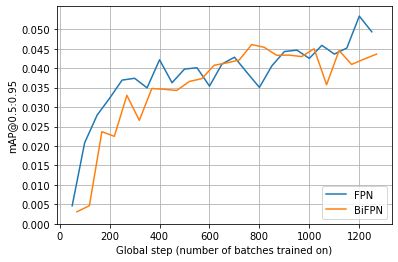

In [8]:
plt.figure(1)
plt.plot([entry["global_step"] for entry in map_entries_fpn], [entry["metrics/mAP"] for entry in map_entries_fpn])
#plt.plot([entry["global_step"] for entry in map_entries_focal_loss], [entry["metrics/mAP"] for entry in map_entries_focal_loss])
#plt.plot([entry["global_step"] for entry in map_entries_dpr_reg_hds], [entry["metrics/mAP"] for entry in map_entries_dpr_reg_hds])
#plt.plot([entry["global_step"] for entry in map_entries_w_init], [entry["metrics/mAP"] for entry in map_entries_w_init])
plt.plot([entry["global_step"] for entry in map_entries_bifpn], [entry["metrics/mAP"] for entry in map_entries_bifpn])
#plt.legend(["fpn", "focal_loss", "dpr_reg_hds", "w init"])
plt.legend(["FPN","BiFPN"], loc='lower right')
plt.yticks(np.arange(0, 0.055, 0.005))
plt.grid()
plt.ylabel("mAP@0.5:0.95")
plt.xlabel("Global step (number of batches trained on)")



In [19]:
# We are saving logs to disk every 10th iteration, thus we need to filter out all entries without a loss
loss_entries_fpn = [entry for entry in logs_fpn if "loss/regression_loss" in entry]
loss_entries_focal_loss = [entry for entry in logs_focal_loss if "loss/regression_loss" in entry]
loss_entries_dpr_reg_hds = [entry for entry in logs_dpr_reg_hds if "loss/regression_loss" in entry]
loss_entries_w_init = [entry for entry in logs_w_init if "loss/regression_loss" in entry]
loss_entries_bifpn = [entry for entry in logs_bifpn if "loss/regression_loss" in entry]

loss_entries_fpn_c = [entry for entry in logs_fpn if "loss/classification_loss" in entry]
loss_entries_focal_loss_c = [entry for entry in logs_focal_loss if "loss/classification_loss" in entry]
loss_entries_dpr_reg_hds_c = [entry for entry in logs_dpr_reg_hds if "loss/classification_loss" in entry]
loss_entries_w_init_c = [entry for entry in logs_w_init if "loss/classification_loss" in entry]
loss_entries_bifpn_c = [entry for entry in logs_bifpn if "loss/classification_loss" in entry]

Text(0.5, 0, 'Global step (number of batches trained on)')

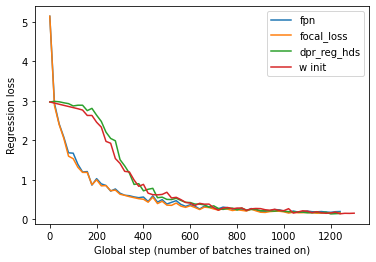

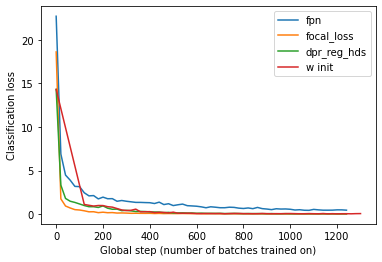

In [26]:
plt.figure(2)
plt.plot([entry["global_step"] for entry in loss_entries_fpn], [entry["loss/regression_loss"] for entry in loss_entries_fpn])
plt.plot([entry["global_step"] for entry in loss_entries_focal_loss], [entry["loss/regression_loss"] for entry in loss_entries_focal_loss])
plt.plot([entry["global_step"] for entry in loss_entries_dpr_reg_hds], [entry["loss/regression_loss"] for entry in loss_entries_dpr_reg_hds])
plt.plot([entry["global_step"] for entry in loss_entries_w_init], [entry["loss/regression_loss"] for entry in loss_entries_w_init])
#plt.plot([entry["global_step"] for entry in loss_entries_bifpn], [entry["loss/regression_loss"] for entry in loss_entries_bifpn])
plt.legend(["fpn", "focal_loss", "dpr_reg_hds", "w init"])
#plt.legend(["fpn","bifpn"])
plt.ylabel("Regression loss")
plt.xlabel("Global step (number of batches trained on)")

plt.figure(3)
plt.plot([entry["global_step"] for entry in loss_entries_fpn_c], [entry["loss/classification_loss"] for entry in loss_entries_fpn_c])
plt.plot([entry["global_step"] for entry in loss_entries_focal_loss_c], [entry["loss/classification_loss"] for entry in loss_entries_focal_loss_c])
plt.plot([entry["global_step"] for entry in loss_entries_dpr_reg_hds_c], [entry["loss/classification_loss"] for entry in loss_entries_dpr_reg_hds_c])
plt.plot([entry["global_step"] for entry in loss_entries_w_init_c], [entry["loss/classification_loss"] for entry in loss_entries_w_init_c])
#plt.plot([entry["global_step"] for entry in loss_entries_bifpn_c], [entry["loss/classification_loss"] for entry in loss_entries_bifpn_c])
plt.legend(["fpn", "focal_loss", "dpr_reg_hds", "w init"])
#plt.legend(["fpn", "bifpn"])
plt.ylabel("Classification loss")
plt.xlabel("Global step (number of batches trained on)")